In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io
from scipy import signal

In [16]:
ls

B.mat  Normal.mat  sample_data/


In [17]:
#Normal DE & FE Data
mat_trdata=io.loadmat('Normal.mat')
NormalDE = mat_trdata.get('X097_DE_time')
NormalFE = mat_trdata.get('X097_FE_time')
length = len(NormalDE)
NormalDE = np.reshape(NormalDE, length)
NormalFE = np.reshape(NormalFE, length)

In [18]:
type(mat_trdata)

dict

In [19]:
mat_trdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM'])

In [26]:
series1=pd.Series(mat_trdata)
pd.DataFrame({'label':series1.index, 'list':series1.values})

,label,list
0,__header__,"b'MATLAB 5.0 MAT-file, Platform: PCWIN, Create..."
1,__version__,1.0
2,__globals__,[]
3,X118_DE_time,"[[-0.0027613972055888225], [-0.096324031936127..."
4,X118_FE_time,"[[-0.24716181818181818], [0.14279090909090908]..."
5,X118_BA_time,"[[0.015531632047477748], [0.016939940652818994..."
6,X118RPM,[[1796]]


In [32]:
# DE, FE & BA Data
mat_trdata=io.loadmat('B.mat')
B_DE = mat_trdata.get('X118_DE_time')
B_FE = mat_trdata.get('X118_FE_time')
B_BA = mat_trdata.get('X118_BA_time')

In [33]:
length = len(B_DE)
B_DE = np.reshape(B_DE, length)
B_FE = np.reshape(B_FE, length)
B_BA = np.reshape(B_BA, length)

In [34]:
def fft_anal(data, fs, name):

    FFTpoint = int(2*len(data))
    HalfFFTpoint = int(FFTpoint/2)
    F = np.fft.fft(data, FFTpoint)
    Mag = np.abs(F)
    length = len(F)
    freq_bin = fs / length
    w = np.arange(0, length)
    w = w * freq_bin

    plt.subplot(211)
    plt.title('Time and Frequency Response : ' + name)
    plt.plot(data), plt.xlabel('Samples')
    plt.subplot(212), plt.plot(w[0:HalfFFTpoint], Mag[0:HalfFFTpoint]), plt.xlabel('Frequency [Hz]'), plt.grid()
    plt.show()

In [35]:
def spectrogram_anal(data, name, fs):

    f, t, Sxx = signal.spectrogram(data, fs)
    plt.subplot(211)
    plt.title('Spectrogram of a Bearing Sound : ' + name)
    plt.plot(data), plt.xlabel('Samples'), plt.ylabel('Amplitude')
    plt.subplot(212)
    plt.pcolormesh(t, f, Sxx), plt.xlabel('Time[Sec]'), plt.ylabel('Frequency[Hz]')
    plt.show()

In [36]:
def spectrogram_compare(data1, data2, name1, name2, fs):

    f1, t1, Sxx1 = signal.spectrogram(data1, fs)
    f2, t2, Sxx2 = signal.spectrogram(data2, fs)

    plt.subplot(211)
    plt.title('Spectrogram of a Bearing Sound : ' + name1)
    plt.pcolormesh(t1, f1, Sxx1)
    plt.subplot(212)
    plt.title('Spectrogram of a Bearing Sound : ' + name2)
    plt.pcolormesh(t2, f2, Sxx2), plt.xlabel('Time[Sec]'), plt.ylabel('Frequency[Hz]')
    plt.show()

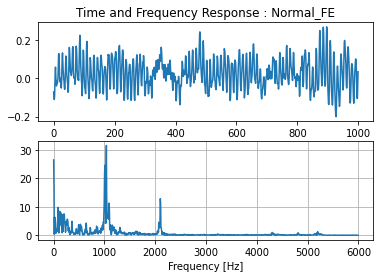

In [37]:
fs = 12000.0
start = 10000
end = 11000
name1 = 'Normal_FE'
name2 = 'B007_DE'
fft_anal(NormalFE[start:end], fs, name1)

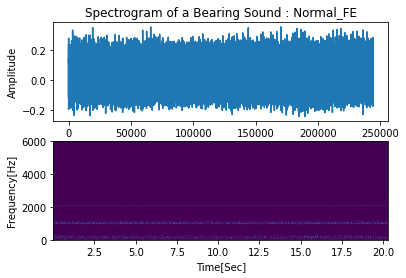

In [38]:
spectrogram_anal(NormalFE, name1, fs)

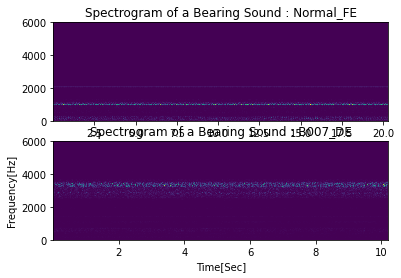

In [39]:
spectrogram_compare(NormalFE, B_DE, name1, name2, fs)